In [1]:
import tensorflow as tf
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [3]:
from google.colab import files
uploaded = files.upload()

Saving facades (2).tar.gz to facades (2).tar.gz


In [7]:
!tar -xvzf "facades (2).tar.gz"


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [8]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1TiwMp1FMrXlnr3gbMNANL-Bdc-F7di-B


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1TiwMp1FMrXlnr3gbMNANL-Bdc-F7di-B

but Gdown can't. Please check connections and permissions.


In [9]:
!gdown --id 1OmfU4q4xfCWMHAWlxCj2YSIPIGLloWvU


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OmfU4q4xfCWMHAWlxCj2YSIPIGLloWvU
From (redirected): https://drive.google.com/uc?id=1OmfU4q4xfCWMHAWlxCj2YSIPIGLloWvU&confirm=t&uuid=d1079ab1-b120-4352-84d7-b614602054c7
To: /content/facades (2).tar.gz
100% 31.7M/31.7M [00:01<00:00, 29.1MB/s]


In [11]:
!tar -xvf "facades (2).tar.gz"

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/test/19.jpg
facades/test/2.jpg
facades/test/20.jpg
facades/test/21.jpg
facades/test/22.jpg
facades/test/23.jpg
facades/test/24.jpg
facades/test/25.jpg
facades/test/26.jpg
facades/test/50.jpg
facades/test/51.jpg
facades/test/52.jpg
facades/test/53.jpg
facades/test/54.jpg
facades/test/55.jpg
facades/test/56.jpg
facades/test/57.jpg
facades/test/58.jpg
facades/test/59.jpg
facades/test/6.jpg
facades/test/60.jpg
facades/test/61.jpg
facades/test/62.jpg
facades/test/63.jpg
facades/test/64.jpg
facades/test/65.jpg
facades/test/66.jpg
facades/test/67.jpg
facades/test/6

In [12]:
import os
os.rename("facades (2).tar.gz", "facades.tar")
!tar -xvf facades.tar


facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/test/19.jpg
facades/test/2.jpg
facades/test/20.jpg
facades/test/21.jpg
facades/test/22.jpg
facades/test/23.jpg
facades/test/24.jpg
facades/test/25.jpg
facades/test/26.jpg
facades/test/50.jpg
facades/test/51.jpg
facades/test/52.jpg
facades/test/53.jpg
facades/test/54.jpg
facades/test/55.jpg
facades/test/56.jpg
facades/test/57.jpg
facades/test/58.jpg
facades/test/59.jpg
facades/test/6.jpg
facades/test/60.jpg
facades/test/61.jpg
facades/test/62.jpg
facades/test/63.jpg
facades/test/64.jpg
facades/test/65.jpg
facades/test/66.jpg
facades/test/67.jpg
facades/test/6

In [13]:
PATH = "/content/facades/"


In [14]:
import tensorflow as tf
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

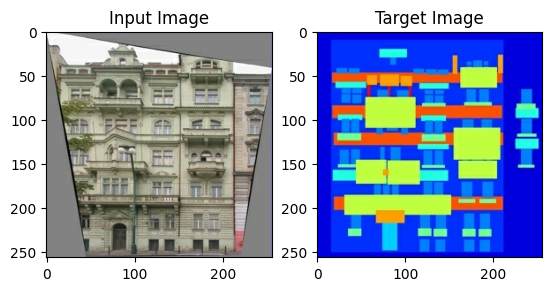

In [16]:
PATH = 'facades/'
#Load & Preprocess the Dataset
def load(image_file):
    # Read and decode image
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)

    # Split into input & real image
    w = tf.shape(image)[1]
    w = w // 2
    input_image = image[:, :w, :]
    real_image = image[:, w:, :]

    # Cast to float32
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

# Example image path
example_path = os.path.join(PATH, 'train/100.jpg')
inp, re = load(example_path)

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(inp / 255.0)
plt.subplot(1, 2, 2)
plt.title("Target Image")
plt.imshow(re / 255.0)
plt.show()


In [17]:
#Preprocessing Functions
IMG_WIDTH = 256
IMG_HEIGHT = 256

def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image, real_image

def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1
    return input_image, real_image

def load_image_train(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = resize(input_image, real_image, IMG_HEIGHT, IMG_WIDTH)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

def load_image_test(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = resize(input_image, real_image, IMG_HEIGHT, IMG_WIDTH)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image


In [18]:
#Create TF Datasets
train_dataset = tf.data.Dataset.list_files(PATH + 'train/*.jpg')
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(400)
train_dataset = train_dataset.batch(1)

test_dataset = tf.data.Dataset.list_files(PATH + 'test/*.jpg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(1)


In [19]:
# Preprocess the Dataset
import tensorflow as tf
import os
import glob
import imageio
import numpy as np

# Set path to your dataset folder (you may need to update this)
data_dir = "/content/facades"  # or your custom folder path

# Check sample file
sample_file = glob.glob(os.path.join(data_dir, "train", "*.jpg"))[0]
print("Sample file path:", sample_file)

Sample file path: /content/facades/train/386.jpg


In [20]:
#Normalize the images to [-1, 1] and Resize/crop if needed (Pix2Pix typically uses 256x256)
def normalize(input_image, target_image):
    input_image = (input_image / 127.5) - 1
    target_image = (target_image / 127.5) - 1
    return input_image, target_image


In [21]:
#Pix2Pix uses a specific format where images are concatenated (A|B), so split them
def load_image_train(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)

    # Split the image into input and real image
    w = tf.shape(image)[1]
    w = w // 2
    input_image = image[:, :w, :]
    target_image = image[:, w:, :]

    input_image = tf.image.resize(input_image, [286, 286])
    target_image = tf.image.resize(target_image, [286, 286])

    # Random crop to 256x256
    stacked_image = tf.stack([input_image, target_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, 256, 256, 3])

    input_image, target_image = cropped_image[0], cropped_image[1]

    # Random jittering (flip)
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        target_image = tf.image.flip_left_right(target_image)

    return normalize(input_image, target_image)


In [22]:
#Create a dataset
train_dataset = tf.data.Dataset.list_files(os.path.join(data_dir, "train/*.jpg"))
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(400).batch(1)


In [23]:
#Build Generator & Discriminator
# Import necessary layers
from tensorflow.keras import layers

# Generator: U-Net
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
        layers.Conv2D(filters, size, strides=2, padding='same',
                      kernel_initializer=initializer, use_bias=False))
    if apply_batchnorm:
        result.add(layers.BatchNormalization())
    result.add(layers.LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
        layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                               kernel_initializer=initializer, use_bias=False))
    result.add(layers.BatchNormalization())
    if apply_dropout:
        result.add(layers.Dropout(0.5))
    result.add(layers.ReLU())
    return result

def Generator():
    inputs = layers.Input(shape=[256, 256, 3])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
        downsample(128, 4),                       # (bs, 64, 64, 128)
        downsample(256, 4),                       # (bs, 32, 32, 256)
        downsample(512, 4),                       # (bs, 16, 16, 512)
        downsample(512, 4),                       # (bs, 8, 8, 512)
        downsample(512, 4),                       # (bs, 4, 4, 512)
        downsample(512, 4),                       # (bs, 2, 2, 512)
        downsample(512, 4),                       # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),     # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True),     # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True),     # (bs, 8, 8, 1024)
        upsample(512, 4),                         # (bs, 16, 16, 1024)
        upsample(256, 4),                         # (bs, 32, 32, 512)
        upsample(128, 4),                         # (bs, 64, 64, 256)
        upsample(64, 4),                          # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(3, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh')  # (bs, 256, 256, 3)

    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

generator = Generator()


In [24]:
#Discriminator (PatchGAN)
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')
    tar = layers.Input(shape=[256, 256, 3], name='target_image')

    x = layers.concatenate([inp, tar])  # (bs, 256, 256, 6)

    down1 = downsample(64, 4, False)(x)  # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1)    # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2)    # (bs, 32, 32, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3)     # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1)  # (bs, 31, 31, 512)

    batchnorm1 = layers.BatchNormalization()(conv)
    leaky_relu = layers.LeakyReLU()(batchnorm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu)  # (bs, 33, 33, 512)
    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2)  # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

discriminator = Discriminator()


In [25]:
# Loss Functions & Optimizers
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [26]:
#Training Loop
import datetime
log_dir = "logs/"
summary_writer = tf.summary.create_file_writer(
    log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_loss', gen_loss, step=epoch)
        tf.summary.scalar('disc_loss', disc_loss, step=epoch)

# Training function
def fit(train_ds, epochs):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}")
        for n, (input_image, target) in train_ds.enumerate():
            train_step(input_image, target, epoch)


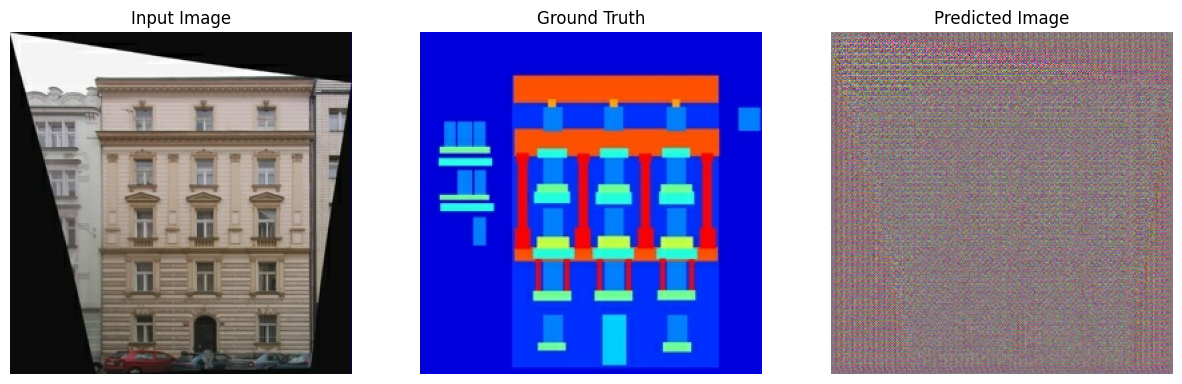

In [27]:
#Generate & Visualize Output
# Generate and visualize predictions from test dataset

def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Rescale from [-1, 1] to [0, 1] for visualization
        plt.imshow((display_list[i] * 0.5 + 0.5))
        plt.axis('off')
    plt.show()


# Take a sample from test dataset
for inp, tar in test_dataset.take(1):
    generate_images(generator, inp, tar)


In [28]:
#Save the Trained Generator Model
generator.save('pix2pix_generator_model.h5')

In [29]:
generator.save('pix2pix_generator_model.keras')

In [30]:
import keras
keras.saving.save_model(generator, 'pix2pix_generator_model.keras')


In [31]:
#load the file
from tensorflow import keras

generator = keras.models.load_model('pix2pix_generator_model.keras', compile=False)


In [32]:
#Test the Generator on a New Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def generate_image(model, test_input):
    prediction = model(test_input, training=True)

    plt.figure(figsize=(15, 5))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow((display_list[i] + 1) / 2)  # Denormalize
        plt.axis('off')
    plt.show()


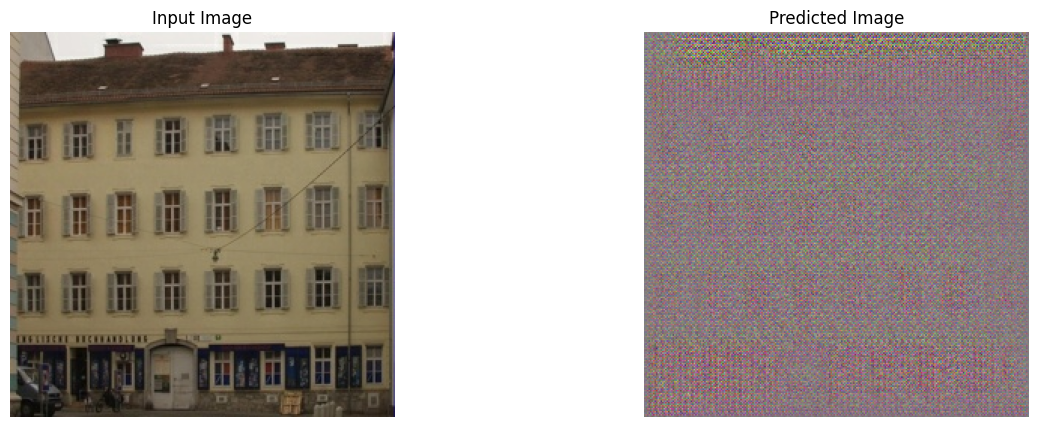

In [33]:
for example_input, _ in test_dataset.take(1):
    generate_image(generator, example_input)
